In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import shapely.geometry as sgeom
%matplotlib inline

In [2]:
# Subset domain text file
# filename = 'subset_input_wpacific.txt'
# filename = 'subset_input_india.txt'
# filename = 'subset_input_indonesia.txt'
# filename = 'subset_input_argentina.txt'
# filename = 'subset_input_europe.txt'
# filename = 'subset_input_sahel.txt'
# filename = 'subset_input_conus.txt'
# filename = 'subset_input_indochina.txt'
# filename = 'subset_input_china.txt'
# filename = 'subset_input_southamerica.txt'
filename = 'subset_input_congo.txt'
# Output figure directory
# figdir = '/global/cfs/cdirs/m1867/zfeng/gpm/mcs_global/figures/'
# figdir = '/global/cscratch1/sd/feng045/tmp/mcs_subset/'

In [3]:
# Get subset region name
region_name = filename.split('.')[0].split('_')[2]
# figdir = f'/global/cscratch1/sd/feng045/tmp/mcs_subset/{region_name}/'
figdir = f'/global/cfs/cdirs/m1867/gsharing/MCS_Global/{region_name}/'
os.makedirs(figdir, exist_ok=True)
# Output figure name
figname = f'{figdir}global_map_domain_{region_name}.png'
figname

'/global/cfs/cdirs/m1867/gsharing/MCS_Global/congo/global_map_domain_congo.png'

## Read subset domain from input text file

In [4]:
# Read text file as dictionary
d = {}
with open(filename) as f:
    for line in f:
        (key, val) = line.strip().split(' ')
        d[key] = val

# Parse the lat/lon limits as float
lonmin = float(d['lonmin'])
lonmax = float(d['lonmax'])
latmin = float(d['latmin'])
latmax = float(d['latmax'])
print(lonmin, lonmax, latmin, latmax)

-20.0 55.0 -15.0 20.0


# Plot subset region on global map

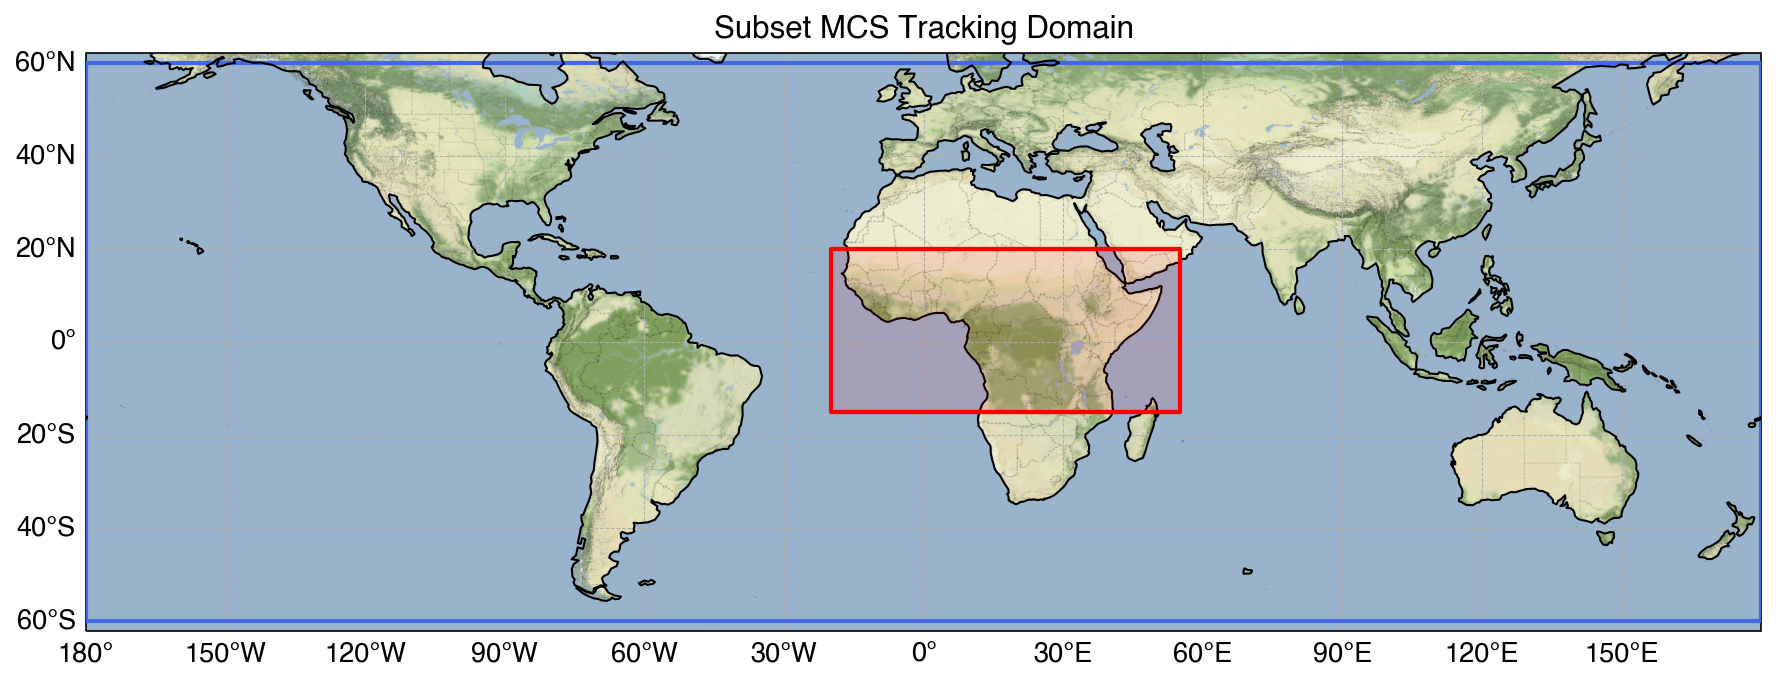

In [5]:
# Define region bounds
box1 = sgeom.box(minx=lonmin, maxx=lonmax, miny=latmin, maxy=latmax)
# box2 = sgeom.box(minx=-150, maxx=-110, miny=latmin, maxy=latmax)

# Global region bounds
box_global = sgeom.box(minx=-180, maxx=180, miny=-60, maxy=60)

mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'Helvetica'

map_extend = [-180, 180.1, -62, 62.1]
lonvals = np.arange(-180,180.1,30)
latvals = np.arange(-80,80.1,20)

fig = plt.figure(figsize=[15,5], dpi=150)
land = cfeature.NaturalEarthFeature('physical', 'land', '110m')
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '110m')
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '110m')
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

proj = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(projection=proj)
ax.set_extent(map_extend, crs=ccrs.PlateCarree())
#         ax.add_feature(ocean, edgecolor='k', facecolor=cfeature.COLORS['water'])
#         ax.add_feature(borders, edgecolor='k', facecolor='none', linewidth=1, zorder=5)
# ax.stock_img()
# Add the Stamen data at zoom level X (larger number is higher resolution).
ax.add_image(stamen_terrain, 4)
ax.add_feature(land, facecolor='none', edgecolor='k', zorder=5)
ax.set_title('Subset MCS Tracking Domain', fontsize=15, fontweight='regular')
# Lat/lon grid lines and labels
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mpl.ticker.FixedLocator(lonvals)
gl.ylocator = mpl.ticker.FixedLocator(latvals)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()        
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

colors_dict = {'global':'royalblue', 'box1':'red', 'box2':'blue'}

# Global region outline
ax.add_geometries([box_global], proj, facecolor='None', edgecolor=colors_dict['global'], lw=2, zorder=4)
# # Subset region
# Fill color
ax.add_geometries([box1], proj, facecolor=colors_dict['box1'], edgecolor=colors_dict['box1'], lw=2, alpha=0.1, zorder=5)
# ax.add_geometries([box2], proj, facecolor=colors_dict['box2'], edgecolor=colors_dict['box2'], lw=2, alpha=0.1, zorder=5)
# Box outline
ax.add_geometries([box1], proj, facecolor='None', edgecolor=colors_dict['box1'], lw=2, zorder=5)
# ax.add_geometries([box2], proj, facecolor='None', edgecolor=colors_dict['box2'], lw=2, zorder=5)

# Region names
# ax.text(115, -45, 'Asia-Pacific', fontsize=30, fontweight='bold', ha='center', va='center', transform=proj, zorder=5)
# ax.text(-60, -15, 'AFR-SAM', fontsize=30, fontweight='bold', ha='center', va='center', transform=proj, zorder=5)

# figname = f'{figdir}global_map_domain.png'
fig.savefig(figname, dpi=200, bbox_inches='tight', facecolor='w')

In [6]:
figname

'/global/cfs/cdirs/m1867/gsharing/MCS_Global/congo/global_map_domain_congo.png'